**Importing The Necessary Libraries**

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy.stats import skew
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [196]:
stocks = pd.read_csv("https://github.com/SrishtiTurki/Stock-Prediction/raw/refs/heads/main/National_Stock_Exchange_of_India_Ltd.csv")

**Describing The Data For Better Understanding of the Data**

In [197]:
stocks.describe()

,Chng,% Chng,Volume (lacs),365 d % chng,30 d % chng
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,-70.133000,-2.930200,71.266600,41.203000,-5.996800
std,163.203678,2.677007,93.462062,37.358646,6.322546
min,-770.500000,-7.480000,0.300000,-16.020000,-22.080000
25%,-66.775000,-4.527500,13.472500,9.375000,-9.665000
50%,-29.975000,-3.300000,30.750000,35.860000,-5.705000
75%,-7.812500,-1.932500,99.200000,65.942500,-2.222500
max,158.400000,7.230000,517.880000,167.950000,6.360000


In [198]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Symbol           50 non-null     object 
 1   Open             50 non-null     object 
 2   High             50 non-null     object 
 3   Low              50 non-null     object 
 4   LTP              50 non-null     object 
 5   Chng             50 non-null     float64
 6   % Chng           50 non-null     float64
 7   Volume (lacs)    50 non-null     float64
 8   Turnover (crs.)  50 non-null     object 
 9   52w H            50 non-null     object 
 10  52w L            50 non-null     object 
 11  365 d % chng     50 non-null     float64
 12  30 d % chng      50 non-null     float64
dtypes: float64(5), object(8)
memory usage: 5.2+ KB


In [199]:
stocks.head()

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
0,ADANIPORTS,750,766,713.25,715,-47.45,-6.22,72.20,532.63,901,384.4,79.22,-4.65
1,ASIANPAINT,"3,101.00","3,167.35","3,091.00","3,138.00",-6.25,-0.20,10.29,322.53,"3,505.00","2,117.15",45.66,5.66
2,AXISBANK,669,674.9,660.45,661,-18.90,-2.78,102.53,684,866.9,568.4,10.19,-21.49
3,BAJAJ-AUTO,"3,370.00","3,383.50","3,320.00","3,335.00",-56.70,-1.67,3.42,114.59,"4,361.40","3,041.00",9.30,-12.05
4,BAJAJFINSV,"17,200.00","17,237.20","16,610.00","16,684.00",-684.85,-3.94,3.42,576.79,"19,325.00","8,273.70",91.38,-9.10


In [200]:
stocks.columns

Index(['Symbol', 'Open', 'High', 'Low', 'LTP', 'Chng', '% Chng',
       'Volume (lacs)', 'Turnover (crs.)', '52w H', '52w L', '365 d % chng',
       '30 d % chng'],
      dtype='object')

**Dropping The Columns Not Necessary For Prediction**

In [201]:
drop = stocks.drop('Symbol', axis=1)

In [202]:
# List of columns to process
drop_int = ['Open', 'High', 'Low', 'LTP', 'Chng', '% Chng',
            'Volume (lacs)', 'Turnover (crs.)', '52w H', '52w L',
            '365 d % chng', '30 d % chng']

# Remove commas and convert to numeric
drop[drop_int] = drop[drop_int].replace({',': ''}, regex=True)  # Remove commas
drop[drop_int] = drop[drop_int].apply(pd.to_numeric, errors='coerce')  # Convert to numeric


**Skewing The Values For Better Stock Prediction**

In [203]:
skewness_values = drop.apply(lambda x: skew(x))

**Data Visualization**

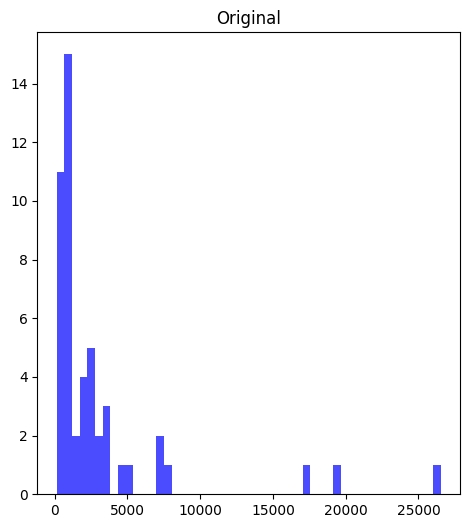

In [204]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(drop['High'], bins=50, color='blue', alpha=0.7)
plt.title('Original')
plt.show()

**Performing Log Transformation**

In [205]:
drop_log_transform = ['Open', 'High', 'Low', 'LTP', 'Volume (lacs)', 'Turnover (crs.)']

# Apply log transformation
for col in drop_log_transform:
    # Check if any column has zero or negative values
    if (drop[col] <= 0).any():
        # Apply log1p to avoid issues with zero or negative values
        drop[col] = np.log1p(drop[col])
    else:
        # Apply standard log transformation
        drop[col] = np.log(drop[col])

# Check the transformed data
drop.head()


,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
0,6.620073,6.641182,6.569832,6.572283,-47.45,-6.22,4.279440,6.277827,901.0,384.40,79.22,-4.65
1,8.039480,8.060651,8.036250,8.051341,-6.25,-0.20,2.331173,5.776196,3505.0,2117.15,45.66,5.66
2,6.505784,6.514565,6.492921,6.493754,-18.90,-2.78,4.630155,6.527958,866.9,568.40,10.19,-21.49
3,8.122668,8.126666,8.107720,8.112228,-56.70,-1.67,1.229641,4.741361,4361.4,3041.00,9.30,-12.05
4,9.752665,9.754825,9.717760,9.722205,-684.85,-3.94,1.229641,6.357478,19325.0,8273.70,91.38,-9.10


**Data Preprocessing**

In [206]:
drop = drop.fillna("")

In [207]:
drop.isnull().sum()

,0
Open,0
High,0
Low,0
LTP,0
Chng,0
% Chng,0
Volume (lacs),0
Turnover (crs.),0
52w H,0
52w L,0


**After Log Transformation**

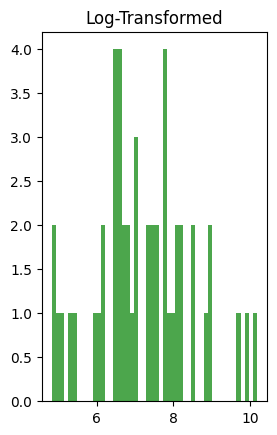

In [208]:
plt.subplot(1, 2, 2)
plt.hist(drop['High'], bins=50, color='green', alpha=0.7)
plt.title('Log-Transformed')
plt.show()

**Predicting Volatility**

In [209]:
y = drop['Chng']
x = drop[['Open', 'High', 'Low', 'LTP', '% Chng',
       'Volume (lacs)', 'Turnover (crs.)', '52w H', '52w L', '365 d % chng',
       '30 d % chng']]

In [210]:
x.shape

(50, 11)

In [211]:
y.shape

(50,)

**Testing and Training**

In [212]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8,random_state=2529)

In [213]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [214]:
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [215]:
y_pred = model.predict(x_test)

In [216]:
y_pred

array([-64.368 , -29.9315, -28.3205, -32.066 , -61.788 ,  78.041 ,
       -58.1775, -64.6445, -35.0305, -41.4015])

**Prediction**

In [217]:
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)

In [218]:
print("The R2 Score is: ", r2)

The R2 Score is:  0.7652561668920289
